In [1]:
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”
Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘plotly’ was built under R version 3.3.2”
Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is

In [2]:
ps = import_biom("../OTU_table/feature-table-metaD-tax.biom","../OTU_table/Trees/fulltree.tre",parseFunction=parse_taxonomy_greengenes)

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [3]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 8979 taxa and 239 samples ]
sample_data() Sample Data:       [ 239 samples by 70 sample variables ]
tax_table()   Taxonomy Table:    [ 8979 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 8979 tips and 8976 internal nodes ]

In [4]:
colnames(sample_data(ps))

[1] "Al_mg_kg"                   "Barcodes"                  
 [3] "Burn_Severity_Index"        "Burned_Unburned"           
 [5] "CBI"                        "CEC_cmol_kg"               
 [7] "CFSI"                       "Ca_mg_kg"                  
 [9] "Clay_pct"                   "Community"                 
[11] "Cu_mg_kg"                   "Dead_Trees"                
[13] "EC_mS_cm"                   "Ecosite"                   
[15] "Fe_mg_kg"                   "Fire_ID"                   
[17] "Forest"                     "Fwd_Primer_Barcode"        
[19] "Interval"                   "K_mg_kg"                   
[21] "Land_Class"                 "Land_Class_Unburned"       
[23] "Live_Trees"                 "Mean_Duff_Depth_cm"        
[25] "Mg_mg_kg"                   "Mn_mg_kg"                  
[27] "Mo_mg_kg"                   "Moisture"                  
[29] "Moisture_Regime"            "Na_mg_kg"                  
[31] "Nutrient"                   "O_Depth_cm"                
[33] "Org_or_Min"                 "Overstory_CBI"             
[35] "P_mg_kg"                    "Pct_Exposed_Mineral"       
[37] "Plains"                     "Project_ID"                
[39] "RBR"                        "Replicate"                 
[41] "Rev_Primer_Barcode"         "Revcomp_Rev_Primer_Barcode"
[43] "S_mg_kg"                    "Sample_ID"                 
[45] "Sample_Name"                "Sand_pct"                  
[47] "Severity_Class"             "Silt_pct"                  
[49] "Site_ID"                    "TC_pct"                    
[51] "TIC_ash_pct"                "TOC_HCL_cruc_pct"          
[53] "TOC_LOI_pct"                "Total_N_pct"               
[55] "Total_S_pct"                "Understory_CBI"            
[57] "Veg_Comm"                   "Zn_mg_kg"                  
[59] "bui"                        "dc"                        
[61] "dmc"                        "ffmc"                      
[63] "fwi"                        "isi"                       
[65] "nTrees"                     "pH"                        
[67] "prec"                       "rh"                        
[69] "temp"                       "ws"

In [5]:
# Setting various parameters as combined values
sample_data(ps)$pH = as.numeric(sample_data(ps)$pH)
sample_data(ps)$Total_C_pct = as.numeric(sample_data(ps)$TC_pct)
sample_data(ps)$Total_N_pct = as.numeric(sample_data(ps)$Total_N_pct)
sample_data(ps)$Total_S_pct = as.numeric(sample_data(ps)$Total_S_pct)
sample_data(ps)$Burn_Severity_Index= as.numeric(sample_data(ps)$Burn_Severity_Index)
sample_data(ps)$CBI= as.numeric(sample_data(ps)$CBI)
sample_data(ps)$RBR= as.numeric(sample_data(ps)$RBR)
sample_data(ps)$CFSI= as.numeric(sample_data(ps)$CFSI)
sample_data(ps)$Mean_Duff_Depth_cm = as.numeric(sample_data(ps)$Mean_Duff_Depth_cm)
sample_data(ps)$Understory_CBI= as.numeric(sample_data(ps)$Understory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Dead_Trees= as.numeric(sample_data(ps)$Dead_Trees)
sample_data(ps)$TotalSeqs=sample_sums(ps)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [6]:
ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)

In [8]:
ps.wb.pruned = prune_samples(sample_sums(ps.wb)>=1500, ps.wb)

In [9]:
ps.wb.pruned.norm = transform_sample_counts(ps.wb.pruned, function(x) x / sum(x) )

In [10]:
ps = ps.wb.pruned.norm

In [66]:
#ord = ordinate(ps, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=1000)

In [12]:
ps.plot = prune_samples(sample_data(ps)$Org_or_Min != "B",ps)
ord = ordinate(ps.plot, method = "NMDS", distance = "bray", k=3, trymax=1000)
#ord = ordinate(ps.plot, method = "NMDS", distance = "UniFrac", weighted=TRUE)

Run 0 stress 0.1290472 
Run 1 stress 0.1294984 
... Procrustes: rmse 0.01455977  max resid 0.1246258 
Run 2 stress 0.1279871 
... New best solution
... Procrustes: rmse 0.01231905  max resid 0.1080978 
Run 3 stress 0.1285245 
Run 4 stress 0.1279803 
... New best solution
... Procrustes: rmse 0.01815669  max resid 0.1428839 
Run 5 stress 0.1290569 
Run 6 stress 0.1329863 
Run 7 stress 0.1289735 
Run 8 stress 0.1284837 
Run 9 stress 0.1317792 
Run 10 stress 0.1287681 
Run 11 stress 0.1285166 
Run 12 stress 0.1309418 
Run 13 stress 0.1343338 
Run 14 stress 0.1282439 
... Procrustes: rmse 0.01738086  max resid 0.1453477 
Run 15 stress 0.1295756 
Run 16 stress 0.1301381 
Run 17 stress 0.1297612 
Run 18 stress 0.1293055 
Run 19 stress 0.1291693 
Run 20 stress 0.1294959 
Run 21 stress 0.1290161 
Run 22 stress 0.1286983 
Run 23 stress 0.1312543 
Run 24 stress 0.1305703 
Run 25 stress 0.1282979 
... Procrustes: rmse 0.009712122  max resid 0.09752219 
Run 26 stress 0.12853 
Run 27 stress 0.13156

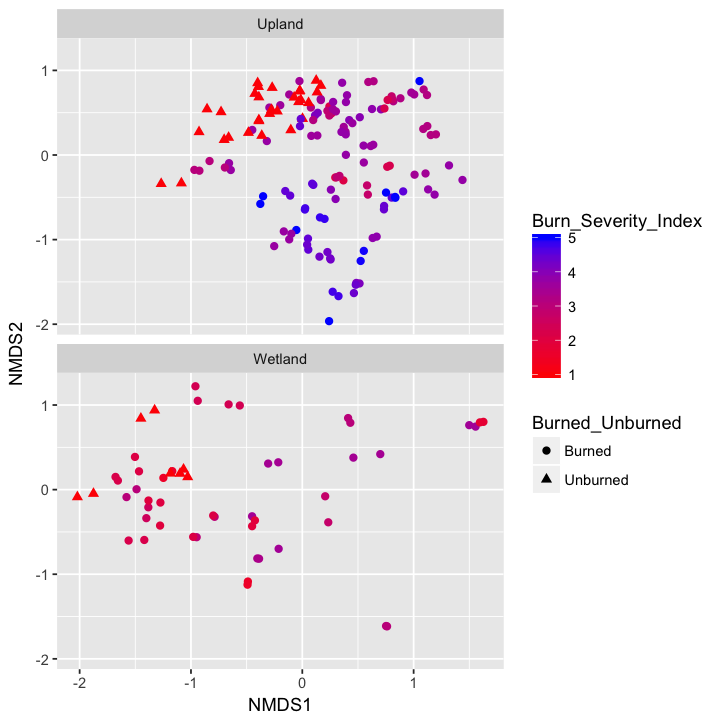

In [13]:
options(repr.plot.width=6, repr.plot.height=6)

#sample_data(ps.plot)$Org_or_Min=droplevels(sample_data(ps.plot)$Org_or_Min)
p = plot_ordination(ps.plot, ord
                    ,color = "Burn_Severity_Index", shape="Burned_Unburned"
                   )

p = p  + geom_point(size=2) + scale_color_gradient(low="red",high="blue") + facet_wrap(~Land_Class, ncol=1) 
p

In [76]:
#ord = ordinate(ps.plot, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=1000)
NMDS.coords = data.frame(ord$points)
# Extracting the coordinates from the ordination
NMDS.coords = merge(NMDS.coords,sample_data(ps.plot), by = 0)
# Merging it with the sample data, by rowname (the same)
NMDS.coords = NMDS.coords %>%
    filter(Land_Class=="Upland" | Land_Class=="Unburned")
plot_ly(NMDS.coords, x = NMDS.coords$MDS1, y = NMDS.coords$MDS2, z = NMDS.coords$MDS3, color = ~NMDS.coords$Burn_Severity_Index
        #, colors = c("red3","tan4","darkorange","skyblue3","chartreuse4")
        , symbol = NMDS.coords$Org_or_Min, symbols = 1:3
        #, alpha = 0.5
       )%>%
    layout(scene = list(xaxis = list(title = "NMDS1"), yaxis = list(title = "NMDS2"),
          zaxis = list(title = "NMDS3")))

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter3d
No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plot.ly/r/reference/#scatter-mode


HTML widgets cannot be represented in plain text (need html)

## How does the phylogenetic breakdown compare within lab replicate samples?

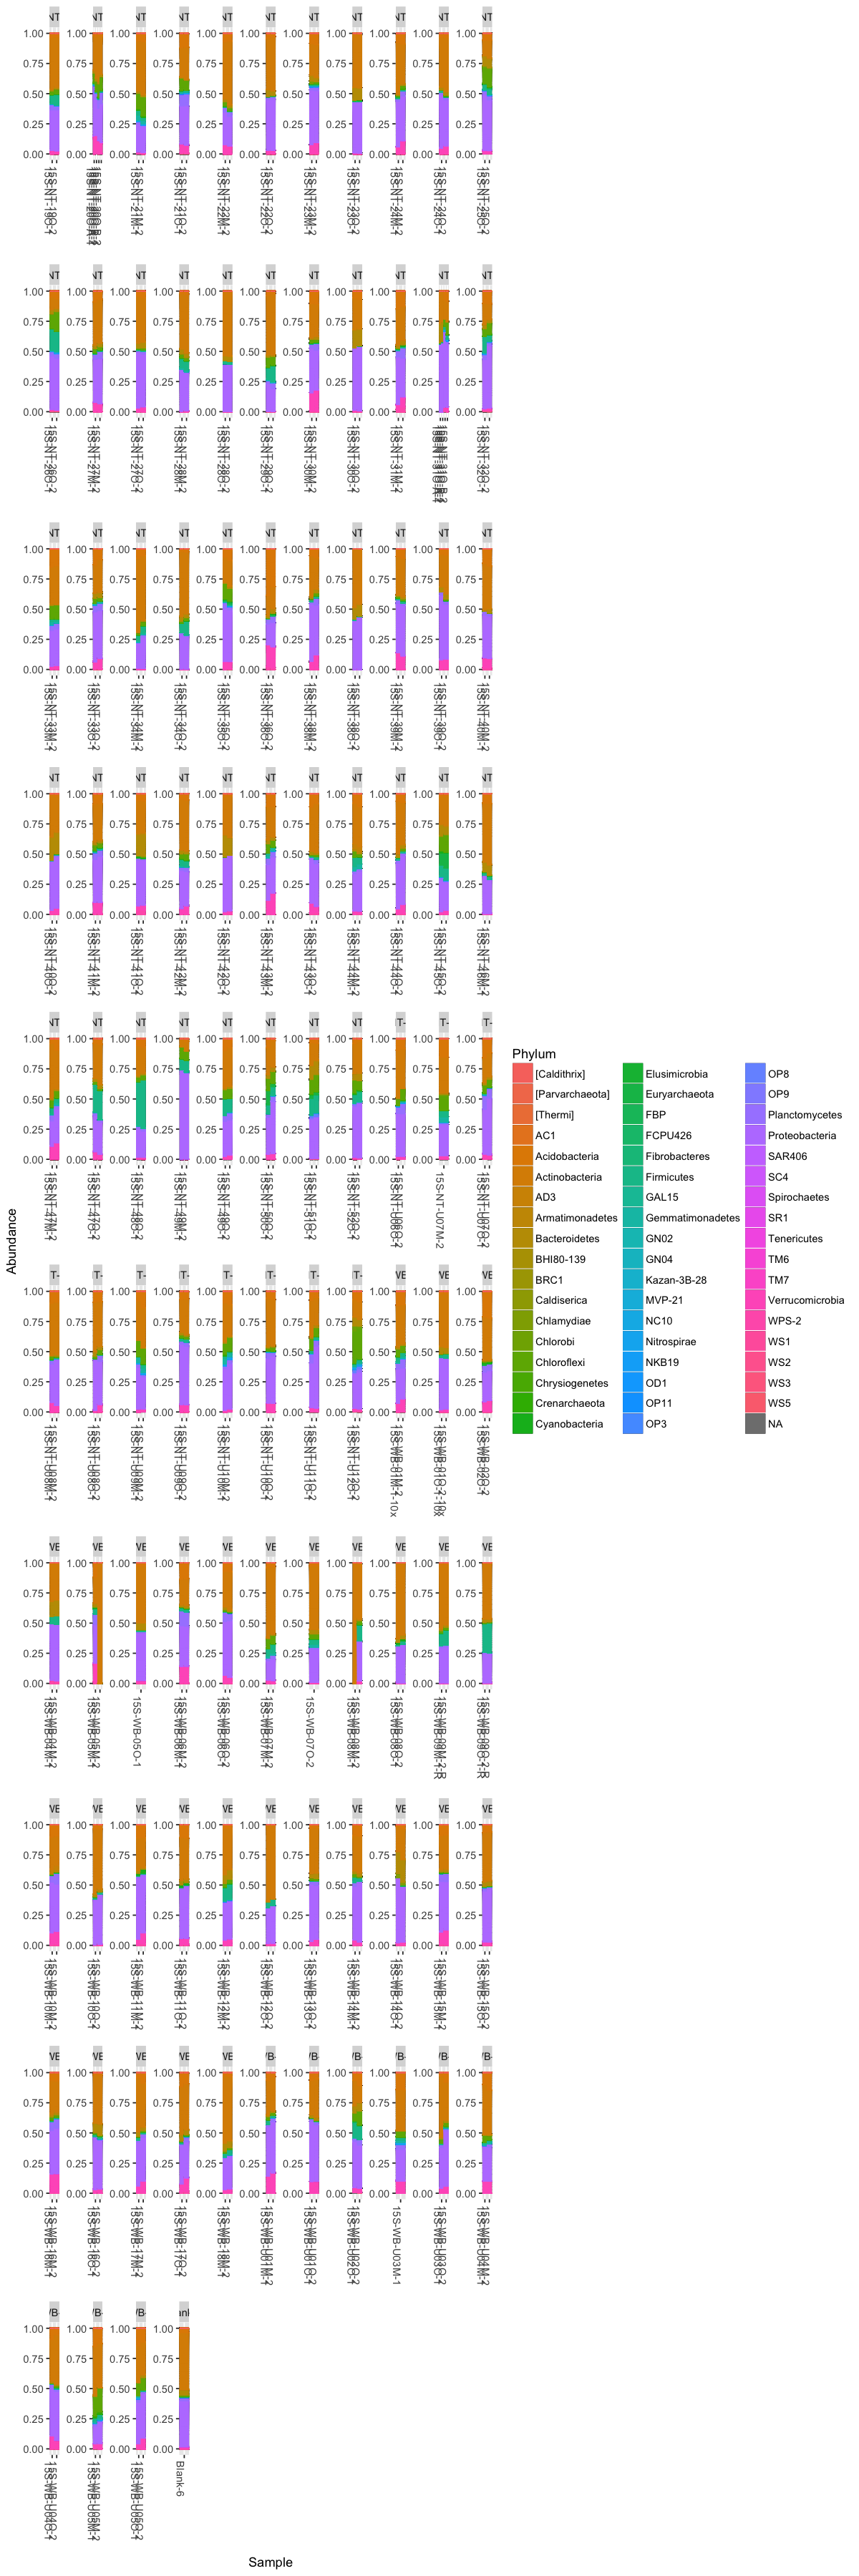

In [12]:
options(repr.plot.width=10, repr.plot.height=30)
#plot_bar(ps, fill="Phylum")
plot_bar(ps, fill="Phylum") + facet_wrap(~Sample_ID, scales="free") + geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")

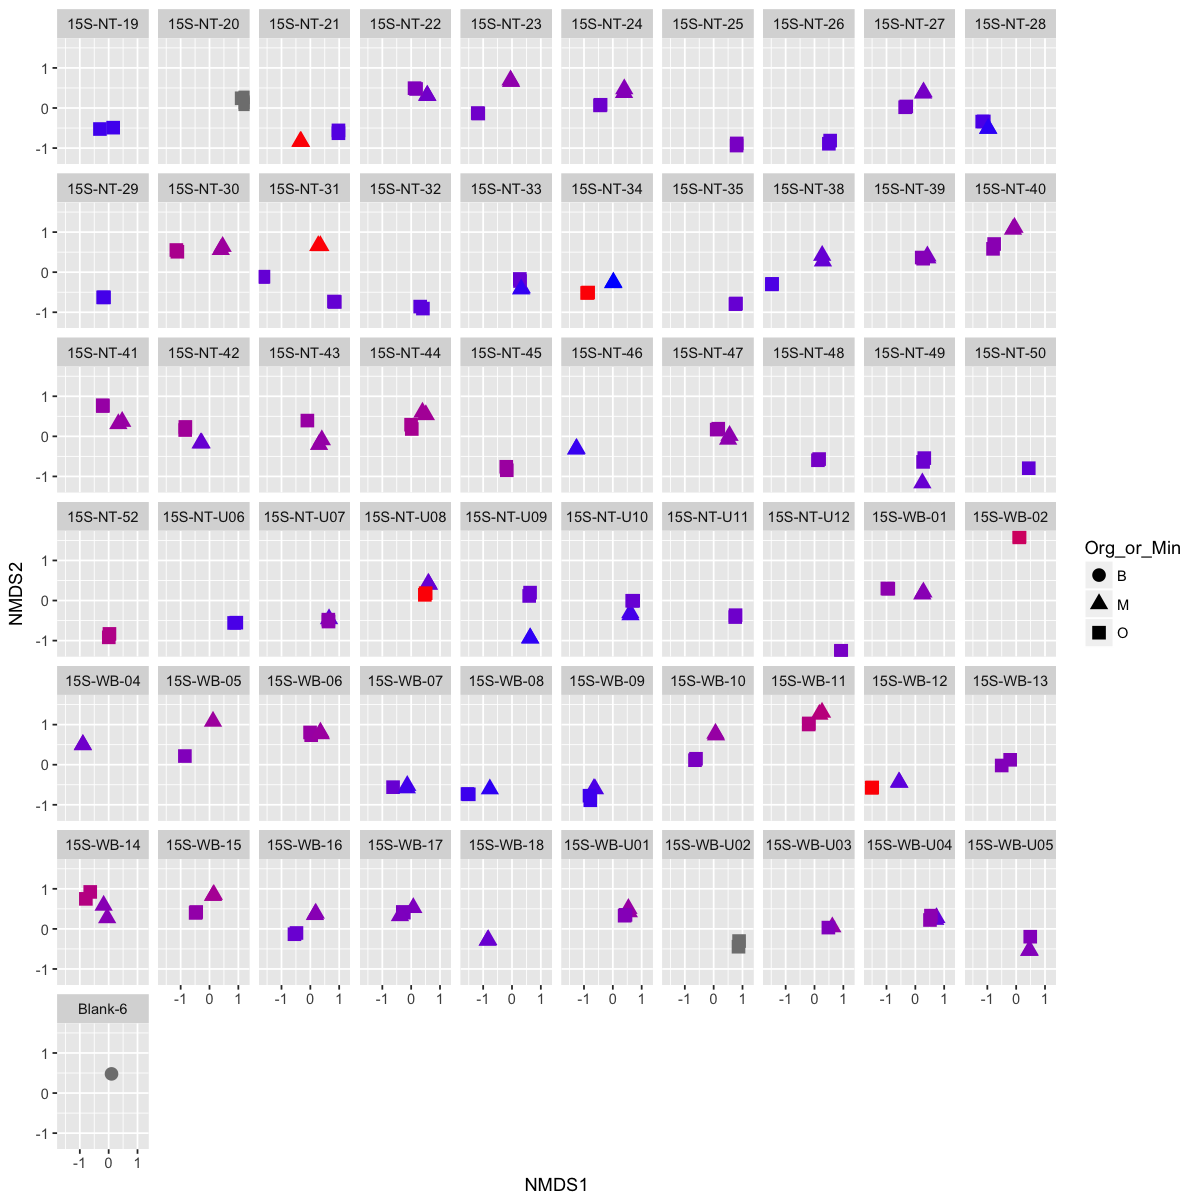

In [239]:
options(repr.plot.width=10, repr.plot.height=10)
p = plot_ordination(ps, ord, color = "pH", shape="Org_or_Min")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + facet_wrap(~Site_ID, ncol=10) + scale_color_gradient(low="red",high="blue") + guides(color=FALSE)
p

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

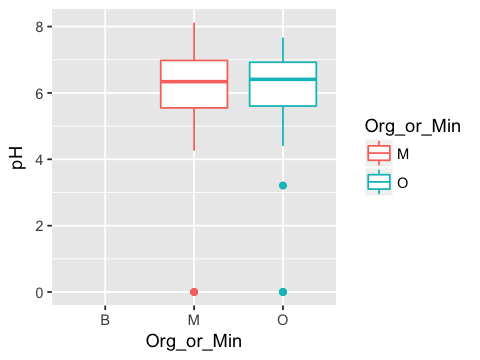

In [248]:
options(repr.plot.width=4, repr.plot.height=3)
p = ggplot(sample_data(ps),aes(y=pH,x=Org_or_Min, color=Org_or_Min))
p = p + geom_boxplot() 
p

## Sample replicates look pretty similar, so we'll merge them for the ordination

In [15]:
ps.merged = merge_samples(ps, "Sample_ID")
ps.merged = transform_sample_counts(ps.merged, function(x) x / sum(x) )
# Note: this averages all sample data - so doesn't work for non-numeric parameters

Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMeth

In [16]:
names=colnames(sample_data(ps))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps)[ , -which(names(sample_data(ps)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

In [257]:
ord = ordinate(ps.merged, method = "NMDS", distance = "bray", weighted=TRUE, k=2, trymax=1000)

Run 0 stress 0.1368981 
Run 1 stress 0.1369477 
... Procrustes: rmse 0.002476024  max resid 0.02062856 
Run 2 stress 0.1368981 
... Procrustes: rmse 2.31792e-05  max resid 0.0002157028 
... Similar to previous best
Run 3 stress 0.1718401 
Run 4 stress 0.1369476 
... Procrustes: rmse 0.002628196  max resid 0.02189788 
Run 5 stress 0.1368981 
... Procrustes: rmse 2.107683e-05  max resid 0.0001753422 
... Similar to previous best
Run 6 stress 0.1368981 
... Procrustes: rmse 6.356324e-05  max resid 0.000587657 
... Similar to previous best
Run 7 stress 0.1369476 
... Procrustes: rmse 0.002604765  max resid 0.0216963 
Run 8 stress 0.1369476 
... Procrustes: rmse 0.002661676  max resid 0.02217308 
Run 9 stress 0.1368981 
... New best solution
... Procrustes: rmse 1.05385e-05  max resid 9.190774e-05 
... Similar to previous best
Run 10 stress 0.1368981 
... Procrustes: rmse 1.704302e-05  max resid 0.0001534394 
... Similar to previous best
Run 11 stress 0.1369476 
... Procrustes: rmse 0.00262

## Wondering if the organic and mineral samples from the same site are similar

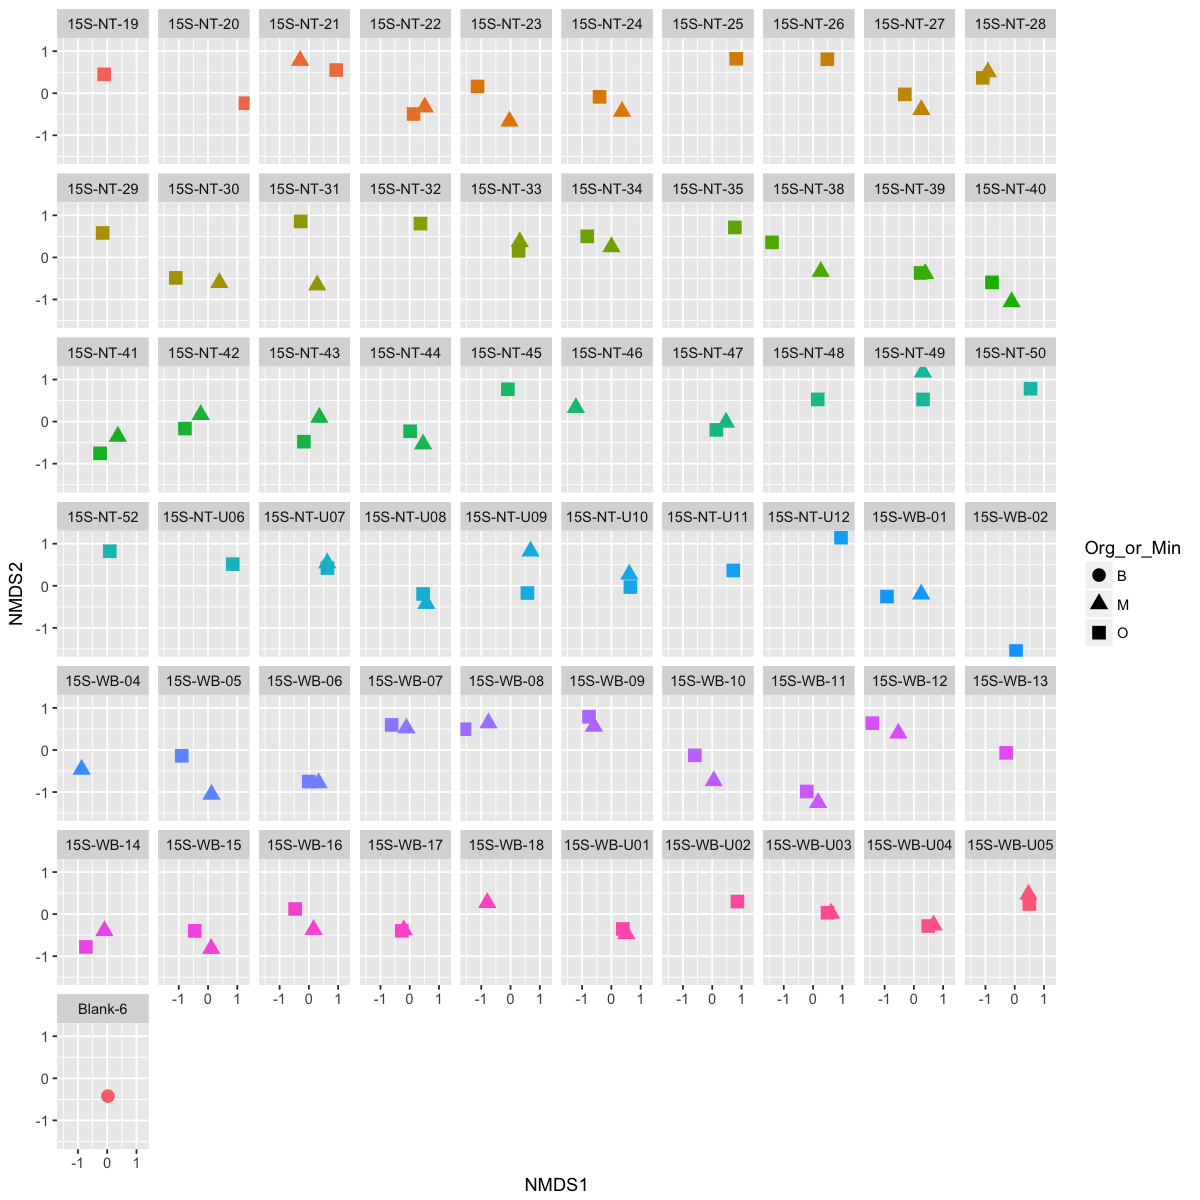

In [189]:
options(repr.plot.width=10, repr.plot.height=10)
p = plot_ordination(ps.merged, ord, color = "Site_ID", shape="Org_or_Min")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + facet_wrap(~Site_ID, ncol=10) + guides(color=FALSE)#+ scale_color_gradient(low="red",high="blue") 
p

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”

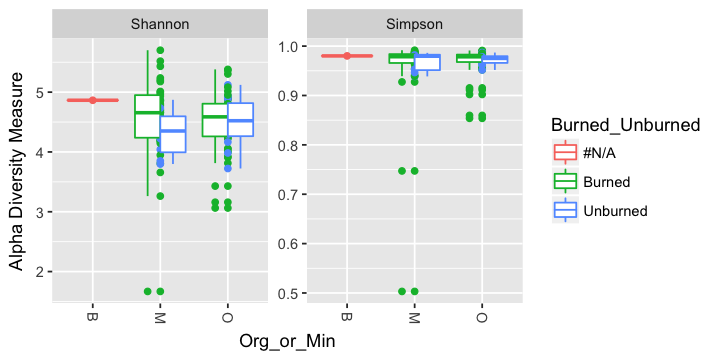

In [21]:
options(repr.plot.width=6, repr.plot.height=3)
p = plot_richness(ps.merged,measures=c("Shannon", "Simpson"), color="Burned_Unburned", x="Org_or_Min")
p = p + geom_boxplot()
p
# x="Site_ID" 

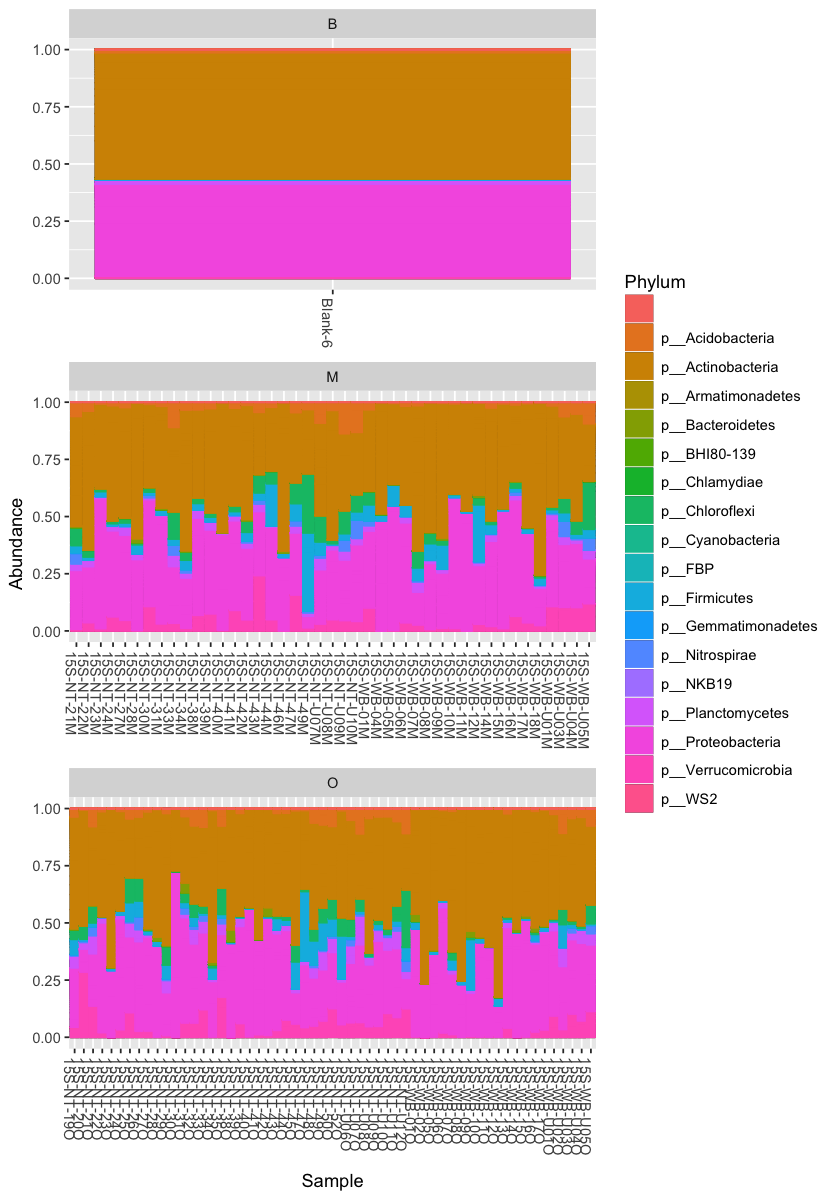

In [289]:
options(repr.plot.width=7, repr.plot.height=10)

plot_bar(ps.merged, fill="Phylum") + geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+ facet_wrap(~Org_or_Min,ncol=1, scales="free")